In [1]:
"""
Data received from 
https://www.knmi.nl/kennis-en-datacentrum/achtergrond/data-ophalen-vanuit-een-script
From: 2017-03-01
TO:   2017-03-29
station number 244

Station info:
https://www.knmi.nl/nederland-nu/klimatologie/daggegevens

Data info:

# BRON: KONINKLIJK NEDERLANDS METEOROLOGISCH INSTITUUT (KNMI)
# Opmerking: door stationsverplaatsingen en veranderingen in waarneemmethodieken zijn deze tijdreeksen van uurwaarden mogelijk inhomogeen! Dat betekent dat deze reeks van gemeten waarden niet geschikt is voor trendanalyse. Voor studies naar klimaatverandering verwijzen we naar de gehomogeniseerde reeks maandtemperaturen van De Bilt <http://www.knmi.nl/klimatologie/onderzoeksgegevens/homogeen_260/index.html> of de Centraal Nederland Temperatuur <http://www.knmi.nl/klimatologie/onderzoeksgegevens/CNT/>.
# 
# 
# STN      LON(east)   LAT(north)     ALT(m)  NAME
# 344:         4.447       51.962      -4.30  ROTTERDAM
# 
# YYYYMMDD = datum (YYYY=jaar,MM=maand,DD=dag); 
# HH       = tijd (HH=uur, UT.12 UT=13 MET, 14 MEZT. Uurvak 05 loopt van 04.00 UT tot 5.00 UT; 
# DD       = Windrichting (in graden) gemiddeld over de laatste 10 minuten van het afgelopen uur (360=noord, 90=oost, 180=zuid, 270=west, 0=windstil 990=veranderlijk. Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken; 
# FH       = Uurgemiddelde windsnelheid (in 0.1 m/s). Zie http://www.knmi.nl/kennis-en-datacentrum/achtergrond/klimatologische-brochures-en-boeken; 
# FF       = Windsnelheid (in 0.1 m/s) gemiddeld over de laatste 10 minuten van het afgelopen uur; 
# FX       = Hoogste windstoot (in 0.1 m/s) over het afgelopen uurvak; 
# T        = Temperatuur (in 0.1 graden Celsius) op 1.50 m hoogte tijdens de waarneming; 
# T10N     = Minimumtemperatuur (in 0.1 graden Celsius) op 10 cm hoogte in de afgelopen 6 uur; 
# TD       = Dauwpuntstemperatuur (in 0.1 graden Celsius) op 1.50 m hoogte tijdens de waarneming; 
# SQ       = Duur van de zonneschijn (in 0.1 uren) per uurvak, berekend uit globale straling  (-1 for <0.05 uur); 
# Q        = Globale straling (in J/cm2) per uurvak; 
# DR       = Duur van de neerslag (in 0.1 uur) per uurvak; 
# RH       = Uursom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm); 
# P        = Luchtdruk (in 0.1 hPa) herleid naar zeeniveau, tijdens de waarneming; 
# VV       = Horizontaal zicht tijdens de waarneming (0=minder dan 100m, 1=100-200m, 2=200-300m,..., 49=4900-5000m, 50=5-6km, 56=6-7km, 57=7-8km, ..., 79=29-30km, 80=30-35km, 81=35-40km,..., 89=meer dan 70km); 
# N        = Bewolking (bedekkingsgraad van de bovenlucht in achtsten), tijdens de waarneming (9=bovenlucht onzichtbaar); 
# U        = Relatieve vochtigheid (in procenten) op 1.50 m hoogte tijdens de waarneming; 
# WW       = Weercode (00-99), visueel(WW) of automatisch(WaWa) waargenomen, voor het actuele weer of het weer in het afgelopen uur. Zie http://bibliotheek.knmi.nl/scholierenpdf/weercodes_Nederland; 
# IX       = Weercode indicator voor de wijze van waarnemen op een bemand of automatisch station (1=bemand gebruikmakend van code uit visuele waarnemingen, 2,3=bemand en weggelaten (geen belangrijk weersverschijnsel, geen gegevens), 4=automatisch en opgenomen (gebruikmakend van code uit visuele waarnemingen), 5,6=automatisch en weggelaten (geen belangrijk weersverschijnsel, geen gegevens), 7=automatisch gebruikmakend van code uit automatische waarnemingen); 
# M        = Mist 0=niet voorgekomen, 1=wel voorgekomen in het voorgaande uur en/of tijdens de waarneming; 
# R        = Regen 0=niet voorgekomen, 1=wel voorgekomen in het voorgaande uur en/of tijdens de waarneming; 
# S        = Sneeuw 0=niet voorgekomen, 1=wel voorgekomen in het voorgaande uur en/of tijdens de waarneming; 
# O        = Onweer 0=niet voorgekomen, 1=wel voorgekomen in het voorgaande uur en/of tijdens de waarneming; 
# Y        = IJsvorming 0=niet voorgekomen, 1=wel voorgekomen in het voorgaande uur en/of tijdens de waarneming; 
# 
"""

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "//datc//opschaler//weather_data//20170101to20180101.txt"
column_names = ['STN','YYYYMMDD','HH','DD','FH','FF','FX','T','T10','TD','SQ','Q','DR','RH','P','VV','N','U','WW','IX','M','R','S','O','Y']

df = pd.read_csv(path, delimiter=',', comment='#', names=column_names, parse_dates=['YYYYMMDD', 'HH'])

df['T'] = df['T']*0.01 # Convert temperature to celcius instead of 0.1 celcius
df['HH'] = df['HH']+':00:00'
df['HH'] = df['HH'].str.strip() # removes the blank spaces infront of the strings
df['HH'] = df['HH'].str.replace('24:00:00', '23:59:59') # KNMI uses 24 for 00 hours.... to have to convert this for to_datetime to be able to work

df.loc[:,'datetime'] = pd.to_datetime(df['YYYYMMDD'].astype(str)+' '+df['HH'].astype(str)) #create datetime column
df.head()

,STN,YYYYMMDD,HH,DD,FH,FF,FX,T,T10,TD,...,N,U,WW,IX,M,R,S,O,Y,datetime
0,344,2017-01-01,1:00:00,210,50,40,80,0.20,,19,...,9,98,32,7,1,1,0,0,0,2017-01-01 01:00:00
1,344,2017-01-01,2:00:00,200,40,40,60,0.19,,18,...,8,98,20,7,1,0,0,0,0,2017-01-01 02:00:00
2,344,2017-01-01,3:00:00,190,50,40,70,0.16,,15,...,8,98,10,7,0,0,0,0,0,2017-01-01 03:00:00
3,344,2017-01-01,4:00:00,200,40,50,70,0.18,,15,...,8,98,10,7,0,0,0,0,0,2017-01-01 04:00:00
4,344,2017-01-01,5:00:00,190,50,50,80,0.11,,7,...,8,97,10,7,0,0,0,0,0,2017-01-01 05:00:00


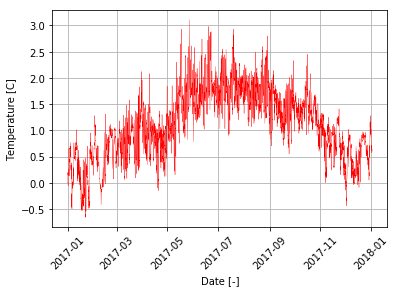

In [4]:
plt.plot(df.datetime, df['T'], '-', color='r', linewidth=0.3)
plt.ylabel('Temperature [C]')
plt.xlabel('Date [-]')
plt.xticks(rotation=45)
plt.grid()

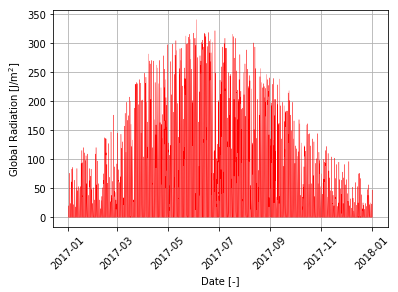

In [5]:
plt.plot(df.datetime, df['Q'], '-', color='r', linewidth=0.3)
plt.ylabel('Global Radiation [J/m$^2$]')
plt.xlabel('Date [-]')
plt.xticks(rotation=45)
plt.grid()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5330e75550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5330f44b38>]], dtype=object)

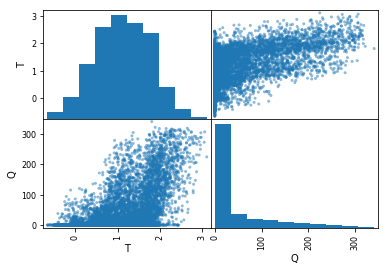

In [6]:
pd.plotting.scatter_matrix(df.loc[:, ['T', 'Q']])

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=344.0, right=344.0
  'left=%s, right=%s') % (left, right))
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=344.0, top=344.0
  'bottom=%s, top=%s') % (bottom, top))
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/pandas/plotting/_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


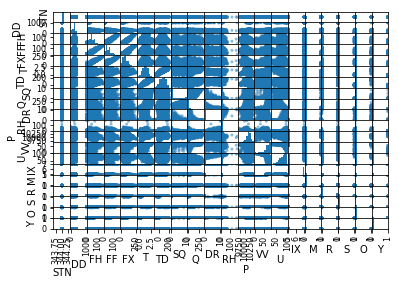

In [7]:
_ = pd.plotting.scatter_matrix(df)